In [1]:
#@title Mounting the Drive
%cd './'

/Users/yusuf/Desktop/XDNNBioimaging


In [2]:
#@title Imports of standard and custom modules/classes
from curses import flash
import logging
import os
from pathlib import Path
from data import DataLoad
from utils import Utils
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from model import Models
import random
logging.basicConfig(level=logging.INFO)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42) 
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
logging.basicConfig(level=logging.INFO)
dl =  DataLoad()
# dl.build(flag=True)
dl.load()

INFO:root:Class instantiated successfully with default input= ./Data/brainTumorDataPublic and output = ./Data/brainTumorDataPublic.npz paths set respectively.
INFO:root:3157 samples loaded successfully belonging to 3 tumor classes.


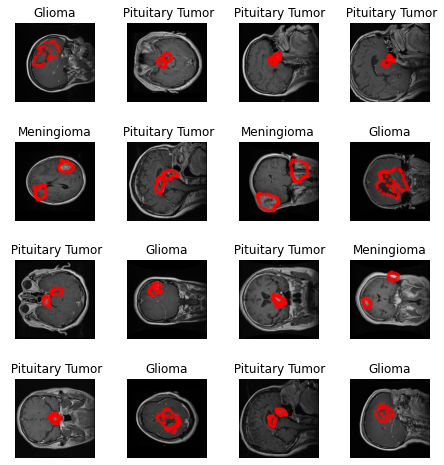

In [ ]:
idx = np.random.randint(0, dl.X.shape[0],16)
Utils.plot_samples(dl.A,dl.y,dl.Z,dl.CLASSES,idx,save=False)

In [ ]:
#@title Splitting the dataset into train/test
X_train,X_test,y_train,y_test = train_test_split(dl.X_,dl.y, test_size=0.2, shuffle=True)

INFO:root:TNSE embedding created successfully. Displaying the 2D projection onto a scatterplot.
INFO:root:Figure ./Figures/Test_XMRI_TSNE_Before.svg written successfully.


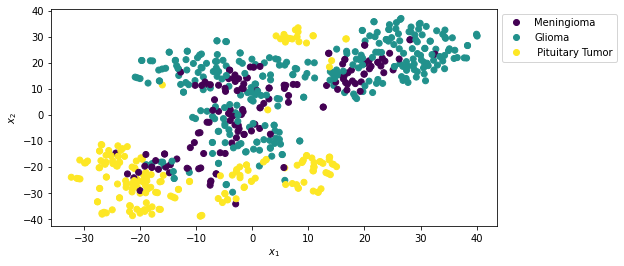

In [ ]:
# Utils.project2D(dl.X_, dl.y,dl.CLASSES,figname='XMRI_TSNE_Before',save=False)
Utils.project2D(X_test, y_test,dl.CLASSES,figname='Test_XMRI_TSNE_Before',save=True)

In [ ]:
#@title Instantiating the Models method
models = Models()

In [ ]:
#@title Training different CNN model
dft = models.train(X_train= X_train,X_test = X_test,y_train = y_train,y_test = y_test,input_shape = X_train.shape[1:],output_nums = len(dl.CLASSES),CLASSES = dl.CLASSES,n=20)

  0%|          | 0/8 [00:00<?, ?it/s]INFO:root:Model built successfully vgg16
INFO:root:We are training vgg16
INFO:root:====================================================================


Epoch 1/20
71/71 [==============================] - 45s 504ms/step - loss: 1.0708 - accuracy: 0.4657 - val_loss: 1.0456 - val_accuracy: 0.4427
Epoch 2/20
71/71 [==============================] - 34s 485ms/step - loss: 0.9437 - accuracy: 0.5242 - val_loss: 0.8018 - val_accuracy: 0.6798
Epoch 3/20
71/71 [==============================] - 35s 492ms/step - loss: 0.7682 - accuracy: 0.6703 - val_loss: 0.7131 - val_accuracy: 0.7154
Epoch 4/20
71/71 [==============================] - 35s 488ms/step - loss: 0.6629 - accuracy: 0.7064 - val_loss: 0.6660 - val_accuracy: 0.7589
Epoch 5/20
71/71 [==============================] - 35s 491ms/step - loss: 0.5552 - accuracy: 0.7540 - val_loss: 0.5500 - val_accuracy: 0.7589
Epoch 6/20
71/71 [==============================] - 35s 488ms/step - loss: 0.4836 - accuracy: 0.7909 - val_loss: 0.4969 - val_accuracy: 0.7984
Epoch 7/20
71/71 [==============================] - 35s 489ms/step - loss: 0.4306 - accuracy: 0.8178 - val_loss: 0.4761 - val_accuracy: 0.7905

INFO:root:Plot saved successfully to ./Figures/vgg16_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/vgg16/assets


INFO:tensorflow:Assets written to: ./Models/vgg16/assets
INFO:root:vgg16 trained and evaluted successfully.
 12%|█▎        | 1/8 [12:39<1:28:34, 759.23s/it]INFO:root:Model built successfully vgg19
INFO:root:We are training vgg19
INFO:root:====================================================================


Epoch 1/20
71/71 [==============================] - 43s 601ms/step - loss: 1.0777 - accuracy: 0.4670 - val_loss: 1.0626 - val_accuracy: 0.4427
Epoch 2/20
71/71 [==============================] - 41s 574ms/step - loss: 1.0512 - accuracy: 0.4665 - val_loss: 1.0556 - val_accuracy: 0.4427
Epoch 3/20
71/71 [==============================] - 42s 589ms/step - loss: 0.9932 - accuracy: 0.4771 - val_loss: 0.8710 - val_accuracy: 0.6166
Epoch 4/20
71/71 [==============================] - 41s 582ms/step - loss: 0.8045 - accuracy: 0.6527 - val_loss: 0.7764 - val_accuracy: 0.6996
Epoch 5/20
71/71 [==============================] - 42s 586ms/step - loss: 0.7170 - accuracy: 0.6796 - val_loss: 0.6265 - val_accuracy: 0.7391
Epoch 6/20
71/71 [==============================] - 42s 586ms/step - loss: 0.6038 - accuracy: 0.7267 - val_loss: 0.5675 - val_accuracy: 0.7470
Epoch 7/20
71/71 [==============================] - 41s 582ms/step - loss: 0.5491 - accuracy: 0.7482 - val_loss: 0.5663 - val_accuracy: 0.7589

INFO:root:Plot saved successfully to ./Figures/vgg19_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/vgg19/assets


INFO:tensorflow:Assets written to: ./Models/vgg19/assets
INFO:root:vgg19 trained and evaluted successfully.
 25%|██▌       | 2/8 [26:41<1:20:48, 808.12s/it]INFO:root:Model built successfully resnet50
INFO:root:We are training resnet50
INFO:root:====================================================================


Epoch 1/20
71/71 [==============================] - 35s 401ms/step - loss: 17.0767 - accuracy: 0.4569 - val_loss: 83783.7656 - val_accuracy: 0.4941
Epoch 2/20
71/71 [==============================] - 27s 376ms/step - loss: 5.9542 - accuracy: 0.5158 - val_loss: 1504.0615 - val_accuracy: 0.5692
Epoch 3/20
71/71 [==============================] - 26s 368ms/step - loss: 3.7155 - accuracy: 0.5832 - val_loss: 1.5540 - val_accuracy: 0.5771
Epoch 4/20
71/71 [==============================] - 26s 373ms/step - loss: 2.9725 - accuracy: 0.6642 - val_loss: 0.7148 - val_accuracy: 0.7233
Epoch 5/20
71/71 [==============================] - 27s 374ms/step - loss: 2.5063 - accuracy: 0.6844 - val_loss: 30.1143 - val_accuracy: 0.6403
Epoch 6/20
71/71 [==============================] - 26s 372ms/step - loss: 3.5949 - accuracy: 0.6518 - val_loss: 0.9200 - val_accuracy: 0.5375
Epoch 7/20
71/71 [==============================] - 26s 372ms/step - loss: 5.0060 - accuracy: 0.7064 - val_loss: 19.5379 - val_accura

INFO:root:Plot saved successfully to ./Figures/resnet50_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/resnet50/assets


INFO:tensorflow:Assets written to: ./Models/resnet50/assets
INFO:root:resnet50 trained and evaluted successfully.
 38%|███▊      | 3/8 [36:04<58:00, 696.18s/it]  INFO:root:Model built successfully xception
INFO:root:We are training xception
INFO:root:====================================================================


Epoch 1/20
71/71 [==============================] - 55s 697ms/step - loss: 0.4863 - accuracy: 0.7896 - val_loss: 1.1004 - val_accuracy: 0.2174
Epoch 2/20
71/71 [==============================] - 46s 652ms/step - loss: 0.1630 - accuracy: 0.9432 - val_loss: 1.0934 - val_accuracy: 0.4427
Epoch 3/20
71/71 [==============================] - 46s 652ms/step - loss: 0.0618 - accuracy: 0.9820 - val_loss: 1.0867 - val_accuracy: 0.4427
Epoch 4/20
71/71 [==============================] - 46s 654ms/step - loss: 0.0179 - accuracy: 0.9969 - val_loss: 1.0676 - val_accuracy: 0.4427
Epoch 5/20
71/71 [==============================] - 46s 650ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.0378 - val_accuracy: 0.4901
Epoch 6/20
71/71 [==============================] - 46s 649ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.9472 - val_accuracy: 0.8300
Epoch 7/20
71/71 [==============================] - 46s 649ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.7523 - val_accuracy: 0.9051

INFO:root:Plot saved successfully to ./Figures/xception_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/xception/assets


INFO:tensorflow:Assets written to: ./Models/xception/assets
INFO:root:xception trained and evaluted successfully.
 50%|█████     | 4/8 [52:49<54:32, 818.06s/it]INFO:root:Model built successfully resnet50v2
INFO:root:We are training resnet50v2
INFO:root:====================================================================


Epoch 1/20
71/71 [==============================] - 30s 358ms/step - loss: 2.6173 - accuracy: 0.6316 - val_loss: 89.1488 - val_accuracy: 0.5771
Epoch 2/20
71/71 [==============================] - 24s 338ms/step - loss: 1.7110 - accuracy: 0.7628 - val_loss: 12.0253 - val_accuracy: 0.6403
Epoch 3/20
71/71 [==============================] - 23s 327ms/step - loss: 1.0389 - accuracy: 0.8336 - val_loss: 1.7940 - val_accuracy: 0.8340
Epoch 4/20
71/71 [==============================] - 23s 330ms/step - loss: 0.4704 - accuracy: 0.8834 - val_loss: 0.2544 - val_accuracy: 0.8972
Epoch 5/20
71/71 [==============================] - 24s 336ms/step - loss: 0.2682 - accuracy: 0.9296 - val_loss: 0.3000 - val_accuracy: 0.9328
Epoch 6/20
71/71 [==============================] - 24s 333ms/step - loss: 0.1995 - accuracy: 0.9485 - val_loss: 0.5566 - val_accuracy: 0.9289
Epoch 7/20
71/71 [==============================] - 23s 331ms/step - loss: 0.0887 - accuracy: 0.9780 - val_loss: 0.3752 - val_accuracy: 0.94

INFO:root:Plot saved successfully to ./Figures/resnet50v2_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/resnet50v2/assets


INFO:tensorflow:Assets written to: ./Models/resnet50v2/assets
INFO:root:resnet50v2 trained and evaluted successfully.
 62%|██████▎   | 5/8 [1:01:10<35:11, 703.79s/it]INFO:root:Model built successfully inception_v3
INFO:root:We are training inception_v3
INFO:root:====================================================================


Epoch 1/20
71/71 [==============================] - 30s 298ms/step - loss: 1.9069 - accuracy: 0.5541 - val_loss: 10210.1670 - val_accuracy: 0.3399
Epoch 2/20
71/71 [==============================] - 19s 268ms/step - loss: 1.2023 - accuracy: 0.6048 - val_loss: 221.8703 - val_accuracy: 0.4150
Epoch 3/20
71/71 [==============================] - 19s 261ms/step - loss: 1.0888 - accuracy: 0.6844 - val_loss: 0.8205 - val_accuracy: 0.6680
Epoch 4/20
71/71 [==============================] - 18s 259ms/step - loss: 0.9369 - accuracy: 0.7086 - val_loss: 9.5300 - val_accuracy: 0.6206
Epoch 5/20
71/71 [==============================] - 19s 261ms/step - loss: 0.5805 - accuracy: 0.7456 - val_loss: 0.6642 - val_accuracy: 0.6996
Epoch 6/20
71/71 [==============================] - 19s 264ms/step - loss: 0.5650 - accuracy: 0.7667 - val_loss: 0.4637 - val_accuracy: 0.8063
Epoch 7/20
71/71 [==============================] - 19s 263ms/step - loss: 0.3991 - accuracy: 0.8319 - val_loss: 0.4403 - val_accuracy: 

INFO:root:Plot saved successfully to ./Figures/inception_v3_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/inception_v3/assets


INFO:tensorflow:Assets written to: ./Models/inception_v3/assets
INFO:root:inception_v3 trained and evaluted successfully.
 75%|███████▌  | 6/8 [1:08:14<20:17, 608.66s/it]INFO:root:Model built successfully densenet121
INFO:root:We are training densenet121
INFO:root:====================================================================


Epoch 1/20
71/71 [==============================] - 44s 442ms/step - loss: 1.3012 - accuracy: 0.6664 - val_loss: 1.4009 - val_accuracy: 0.6482
Epoch 2/20
71/71 [==============================] - 27s 381ms/step - loss: 0.8300 - accuracy: 0.7883 - val_loss: 1.0562 - val_accuracy: 0.6640
Epoch 3/20
71/71 [==============================] - 27s 378ms/step - loss: 0.6315 - accuracy: 0.8415 - val_loss: 0.6537 - val_accuracy: 0.6917
Epoch 4/20
71/71 [==============================] - 27s 381ms/step - loss: 0.5143 - accuracy: 0.8746 - val_loss: 0.8546 - val_accuracy: 0.7628
Epoch 5/20
71/71 [==============================] - 27s 381ms/step - loss: 0.2836 - accuracy: 0.9089 - val_loss: 0.4552 - val_accuracy: 0.8142
Epoch 6/20
71/71 [==============================] - 27s 379ms/step - loss: 0.1794 - accuracy: 0.9397 - val_loss: 0.2177 - val_accuracy: 0.9289
Epoch 7/20
71/71 [==============================] - 27s 380ms/step - loss: 0.0919 - accuracy: 0.9648 - val_loss: 0.2541 - val_accuracy: 0.9130

In [ ]:
#@title Reading evaluation results from a csv file
dft =  pd.read_csv('./Data/Evaluation_Results.csv')
dft

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


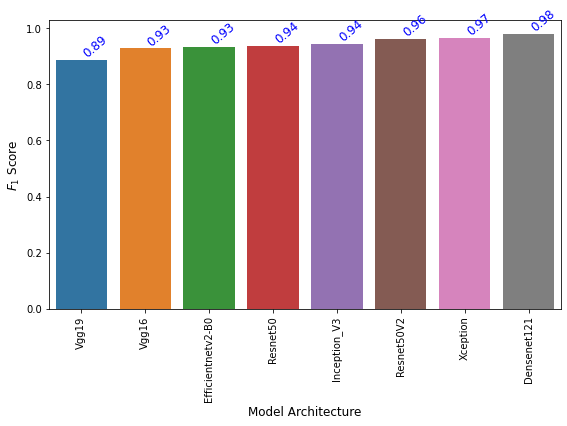

In [ ]:
#@title Plotting Models test performance
# sort df by Count column
dft['model'] = dft['model'].apply(lambda x: str(x).title())
pd_df = dft.sort_values(['f1_score']).reset_index(drop=True)
plt.figure(figsize=(8,6))
# plot barh chart with index as x values
ax = sns.barplot(pd_df.model, pd_df.f1_score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(np.round(float(x),1))))
ax.set_xlabel("Model Architecture",fontsize=12)
ax.set_ylabel(r"$F_1$ Score",fontsize=12)
# add proper Dim values as x labels
ax.set_xticklabels(pd_df.model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(pd_df["f1_score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(np.round(v[1],2)), color='b', va ='bottom', rotation=40, fontsize=12)
plt.tight_layout()
plt.savefig(f'./Figures/Train_Time_Accuracy.svg', bbox_inches ="tight", dpi=300)
plt.show()

In [ ]:
#@title We load a saved trained model: xception, resnet50v2, densenet121
model_name = 'xception'
model = tf.keras.models.load_model(f"./Models/{model_name}")
repmodel  = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output, name = model.name)

INFO:root:TNSE embedding created successfully. Displaying the 2D projection onto a scatterplot.
INFO:root:Figure ./Figures/Test_set_xception.svg written successfully.


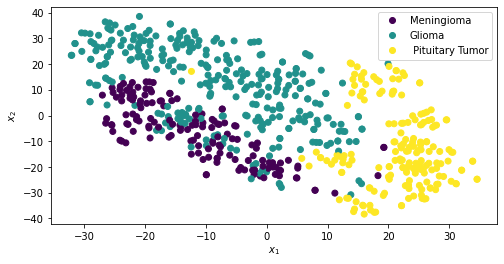

In [ ]:
X_hat =  repmodel.predict(X_test)
Utils.project2D(X_hat, y_test,dl.CLASSES,figname=f'Test_set_{model_name}',save=True)

INFO:root:TNSE embedding created successfully. Displaying the 2D projection onto a scatterplot.
INFO:root:Figure ./Figures/Test_set_densenet121.svg written successfully.


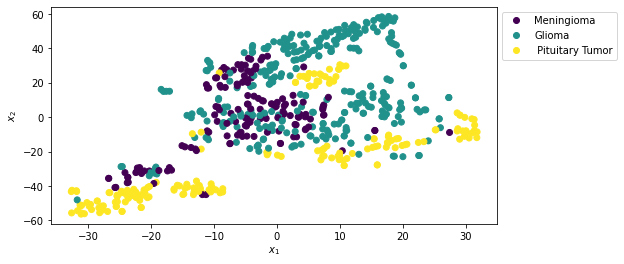

In [ ]:
X_hat =  repmodel.predict(X_test)
Utils.project2D(X_hat, y_test,dl.CLASSES,figname=f'Test_set_{model_name}',save=False)

INFO:root:TNSE embedding created successfully. Displaying the 2D projection onto a scatterplot.
INFO:root:Figure ./Figures/densenet121.svg written successfully.


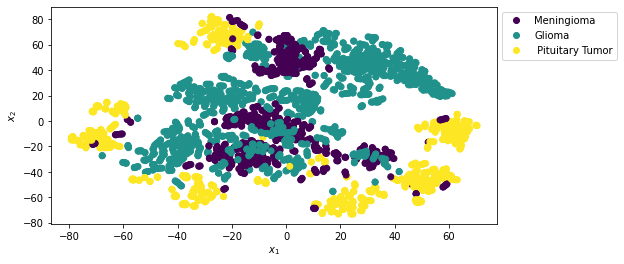

In [ ]:
#@title We are using the internal layers of the model to get the learnt representation of the dataset
X_hat =  repmodel.predict(dl.X_)
Utils.project2D(X_hat, dl.y,dl.CLASSES,figname=f'{model_name}',save=True)

In [ ]:
#@title We are using T-SNE to visualize the latent representations of the selected model
# X_hat =  repmodel.predict(dl.X_)
# Utils.project2D(X_hat, dl.y,dl.CLASSES,figname=f'{model_name}_XMRI_TSNE_After',save=True)

# Salency Analysis

In [ ]:
%pip install saliency

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Importing the saliency module. If not installed use the above pip command to install it in your environment
import PIL.Image
from matplotlib import pylab as P
# From our repository.
import saliency.core as saliency
from saliency.metrics import pic
import PIL.Image
%matplotlib inline

In [ ]:
#@title Snippet to compute prediction_feature gradients
class_idx_str = 'class_idx_str'
def call_model_function(images, call_model_args=None, expected_keys=None):
    target_class_idx =  call_model_args[class_idx_str]
    images = tf.convert_to_tensor(images)
    with tf.GradientTape() as tape:
        if expected_keys==[saliency.base.INPUT_OUTPUT_GRADIENTS]:
            tape.watch(images)
            output_layer = model(images)
            output_layer = output_layer[:,target_class_idx]
            gradients = np.array(tape.gradient(output_layer, images))
            return {saliency.base.INPUT_OUTPUT_GRADIENTS: gradients}
        else:
            conv_layer, output_layer = model(images)
            gradients = np.array(tape.gradient(output_layer, conv_layer))
            return {saliency.base.CONVOLUTION_LAYER_VALUES: conv_layer,
                    saliency.base.CONVOLUTION_OUTPUT_GRADIENTS: gradients}

def PreprocessImage(im):
  # im = tf.keras.applications.vgg16.preprocess_input(im)
  return tf.keras.applications.xception.preprocess_input(im)

In [ ]:
#@title We are select unique sample indices from each class 
def pick_indices(dl):
  sidx =  []
  labels = []

  while(len(labels) < 3):
    idx = np.random.randint(0,dl.X_.shape[0])
    label = dl.y[idx]
    if( label not in labels):
      sidx.append(idx)
      labels.append(label)
  return sidx

In [ ]:
#@title Function to perform model inference
def inference(samples,idx,model):
  im = im = dl.X_[idx]
  predictions = model(np.array([im]))
  prediction_class = np.argmax(predictions[0])
  call_model_args = {class_idx_str: prediction_class}
  pred_prob = np.round(predictions[0,prediction_class].numpy(),2)
  return predictions,prediction_class,call_model_args,pred_prob

In [ ]:
indices = pick_indices(dl)

In [ ]:
#@title We load a saved trained model: xception, resnet50v2, densenet121,efficientnetv2-b0,inception_v3,resnet50
model_name = 'inception_v3'
model = tf.keras.models.load_model(f"./Models/{model_name}")

## Metrics

In [ ]:
#@title Saliency Computation Code updated 2
data =  {'img': [], 'tumorBorder': [], 'original': [],'predictions': [], 'prediction_class': [],'call_model_args':[],'pred_prob':[],'actual': [],'idx': []}
vizresult = {'Image': [],'tumorBorder': [], 'VG': [] ,'SmoothGrad': [] ,'IG': [] ,'SmoothGrad': [] ,'XRAI_Full': [] ,'Fast_XRAI' :[] ,'VIG': [], 'GIG': [] ,'Blur_IG':[]}
mycollection = []
orgin_data = []
for idx in indices:
  predictions,prediction_class,call_model_args,pred_prob = inference(dl,idx,model)
  data['img'].append(dl.X_[idx])
  data['tumorBorder'].append(dl.Z[idx])
  data['original'].append(dl.A[idx])
  data['predictions'].append(predictions)
  data['prediction_class'].append(prediction_class)
  data['call_model_args'].append(call_model_args)
  data['pred_prob'].append(pred_prob)
  data['actual'].append(dl.y[idx])
  data['idx'].append(idx)

  im =  dl.X_[idx]
  vizresult['Image'].append(dl.A[idx])
  vizresult['tumorBorder'].append(dl.Z[idx])


  # Construct the saliency object. This alone doesn't do anthing.
  gradient_saliency = saliency.GradientSaliency()

  # Compute the vanilla mask and the smoothed mask.
  vanilla_mask_3d = gradient_saliency.GetMask(im, call_model_function, call_model_args)
  smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args)

  # Call the visualization methods to convert the 3D tensors to 2D grayscale.
  vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_mask_3d)
  smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)
  vizresult['VG'].append(vanilla_mask_grayscale)
  vizresult['SmoothGrad'].append(smoothgrad_mask_grayscale)


  mycollection.append(dl.A[idx])
  mycollection.append(vanilla_mask_grayscale)
  mycollection.append(smoothgrad_mask_grayscale)


  # Construct the saliency object. This alone doesn't do anthing.
  integrated_gradients = saliency.IntegratedGradients()

  # Baseline is a black image.
  baseline = np.zeros(im.shape)

  # Compute the vanilla mask and the smoothed mask.
  vanilla_integrated_gradients_mask_3d = integrated_gradients.GetMask(
    im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, batch_size=20)
  # Smoothed mask for integrated gradients will take a while since we are doing nsamples * nsamples computations.
  smoothgrad_integrated_gradients_mask_3d = integrated_gradients.GetSmoothedMask(
    im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, batch_size=20)

  # Call the visualization methods to convert the 3D tensors to 2D grayscale.
  vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_integrated_gradients_mask_3d)
  smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_integrated_gradients_mask_3d)

  mycollection.append(vanilla_mask_grayscale)
  mycollection.append(smoothgrad_mask_grayscale)


  # Construct the saliency object. This alone doesn't do anthing.
  xrai_object = saliency.XRAI()

  # Compute XRAI attributions with default parameters
  xrai_attributions = xrai_object.GetMask(im, call_model_function, call_model_args, batch_size=20)

  # Show most salient 30% of the image
  mask = xrai_attributions > np.percentile(xrai_attributions, 70)
  im_mask =  np.array(im)
  im_mask[~mask] = 0

  mycollection.append(xrai_attributions)
  mycollection.append(im_mask)

  # Construct the saliency object. This doesn't yet compute the saliency mask, it just sets up the necessary ops.
  integrated_gradients = saliency.IntegratedGradients()
  guided_ig = saliency.GuidedIG()

  # Baseline is a black image for vanilla integrated gradients.
  baseline = np.zeros(im.shape)

  # Compute the vanilla mask and the Guided IG mask.
  vanilla_integrated_gradients_mask_3d = integrated_gradients.GetMask(
    im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, batch_size=20)
  guided_ig_mask_3d = guided_ig.GetMask(
    im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, max_dist=1.0, fraction=0.5)

  # Call the visualization methods to convert the 3D tensors to 2D grayscale.
  vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_integrated_gradients_mask_3d)
  guided_ig_mask_grayscale = saliency.VisualizeImageGrayscale(guided_ig_mask_3d)

  mycollection.append(vanilla_mask_grayscale)
  mycollection.append(guided_ig_mask_grayscale)


  # Compare BlurIG and Smoothgrad with BlurIG. Note: This will take a long time to run.

  # Construct the saliency object. This alone doesn't do anthing.
  blur_ig = saliency.BlurIG()

  # Compute the Blur IG mask and Smoothgrad+BlurIG mask.
  blur_ig_mask_3d = blur_ig.GetMask(im, call_model_function, call_model_args, batch_size=20)
  # Smoothed mask for BlurIG will take a while since we are doing nsamples * nsamples computations.
  smooth_blur_ig_mask_3d = blur_ig.GetSmoothedMask(im, call_model_function, call_model_args, batch_size=20)

  # Call the visualization methods to convert the 3D tensors to 2D grayscale.
  blur_ig_mask_grayscale = saliency.VisualizeImageGrayscale(blur_ig_mask_3d)
  smooth_blur_ig_mask_grayscale = saliency.VisualizeImageGrayscale(smooth_blur_ig_mask_3d)

  mycollection.append(blur_ig_mask_grayscale)
  mycollection.append(smooth_blur_ig_mask_grayscale)


INFO:saliency.core.xrai:Computing IG...
INFO:saliency.core.xrai:Done with IG. Computing XRAI...
INFO:saliency.core.xrai:Computing IG...
INFO:saliency.core.xrai:Done with IG. Computing XRAI...


In [ ]:
#@title Visualizating the saliency maps
titles = ['Input Image', 'Vanilla Gradient','SmoothGrad','Integrated Gradients','SmoothGrad','XRAI Full','Fast XRAI 30%','VIG', 'Guided IG','Blur IG','Smooth Blur IG']
r,c =  3,len(mycollection)//3 #r is the  number of rows and c is the number of columns
img_idx =  list(np.arange(0,int(r*c),c))
fig, axs = plt.subplots(r,c, figsize=(22,8), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .002, wspace=.001)
fig.subplots_adjust(left=0.125,bottom=0.2,right=0.9,top=0.9,wspace=0.2,hspace=0.35)
axs = axs.ravel()
for i in range(int(r*c)):
  if( i in list(range(c))):
    axs[i].set_title(titles[i],fontsize=12)
  axs[i].imshow(np.squeeze(mycollection[i]), cmap='gray')
  # axs[i].axis('off')
  axs[i].xaxis.set_ticklabels([])
  axs[i].yaxis.set_ticklabels([])
  if(i  in img_idx):
    if(i == img_idx[0]):
      tumorBorder = data['tumorBorder'][0]
      axs[i].set_ylabel(f'{str(dl.CLASSES[dl.y[data["idx"][0]]]).title()}',fontsize=12)
      # axs[i].set_ylabel(f'Pred: {dl.CLASSES[data["prediction_class"][0]].title()}',fontsize=12)
    elif(i == img_idx[1]):
      tumorBorder = data['tumorBorder'][1]
      axs[i].set_ylabel(f'{str(dl.CLASSES[dl.y[data["idx"][1]]]).title()}',fontsize=12)
      # axs[i].set_ylabel(f'Pred: {dl.CLASSES[data["prediction_class"][1]].title()}',fontsize=12)
    elif(i == img_idx[2]):
      tumorBorder = data['tumorBorder'][2]
      axs[i].set_ylabel(f'{str(dl.CLASSES[dl.y[data["idx"][2]]]).title()}',fontsize=12)
      # axs[i].set_ylabel(f'Pred: {dl.CLASSES[data["prediction_class"][2]].title()}',fontsize=12)
    for j in range(tumorBorder.shape[0]-1):
      axs[i].scatter(tumorBorder[j],  tumorBorder[j+1],marker=".", color="red", s=200, alpha=0.6,zorder=2)
fig.tight_layout()
plt.savefig(f'./Figures/Saliency_Maps_{model.name}.svg', bbox_inches ="tight", dpi=300)
plt.show()